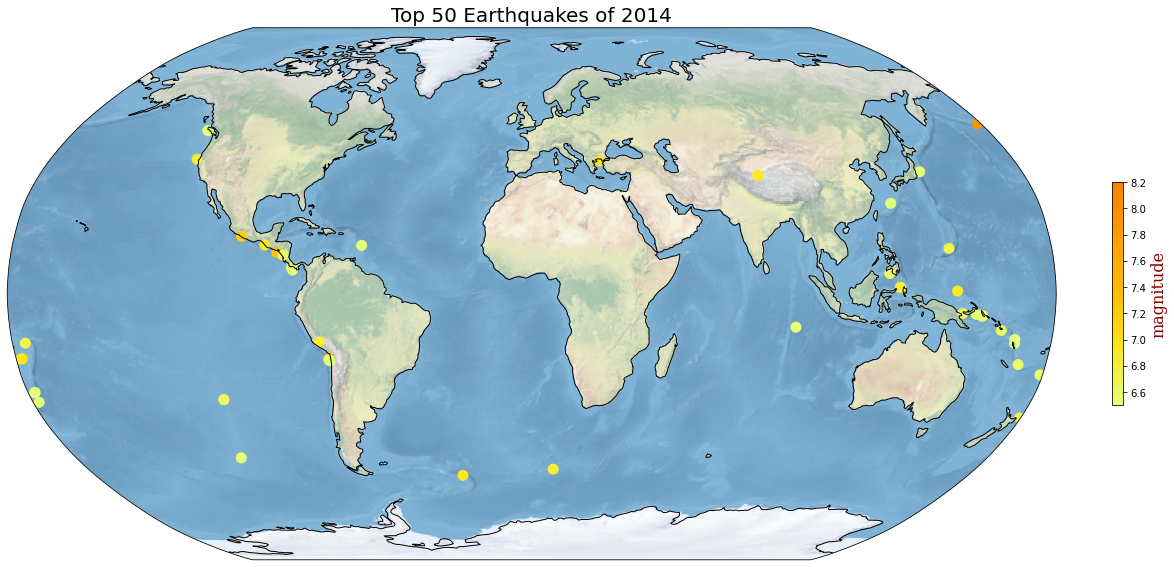

In [16]:
#%% Question 1
from numpy.lib.function_base import select
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

data = pd.read_csv('F:/usgs_earthquakes.csv')
lat = list(data.iloc[:,1].values)
lon = list(data.iloc[:,2].values)
mag = list(data.iloc[:,4].values)

sortedmag=sorted(mag,reverse=1)
# print(sortedmag)
dataset = sortedmag[0:50]
# print(dataset)
redataset = sorted(list(set(dataset)),reverse=1)
# print(redataset)
# 
select_mag = []
select_lat = []
select_lon = []
for i in redataset:
    for j in range(len(mag)):
        if i==mag[j]:
            select_mag.append(i)
            select_lat.append(lat[j])
            select_lon.append(lon[j])
        if len(select_mag) == 50:
            break        

fig=plt.figure(figsize=(20,15))#设置一个画板，将其返还给fig
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())
ax.coastlines()
ax.stock_img()

plt.scatter(select_lon,select_lat,s=100,c=select_mag, cmap='Wistia', transform=ccrs.PlateCarree())

plt.title('Top 50 Earthquakes of 2014',fontsize=20)

# colorbar
cb=plt.colorbar(fraction=0.01)
font = {'family' : 'serif',
        'color'  : 'darkred',
        'weight' : 'normal',
        'size'   : 16,
        }
cb.set_label('magnitude',fontdict=font) #设置colorbar的标签字体及其大小
plt.show()


